In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SepsisDataset/GSE54514_metadata.csv')
df


,database,submission_date,release_date,last_update_date,title,accession,type,source,organism,tissue,...,site of infection,molecule,extract_protocol,label,label_protocol,hybridization_protocol,scan_protocol,description,data_processing,Unnamed: 26
0,GEO,29-01-14,04-02-14,04-02-14,"PAXgene whole blood, Control, Day_1, ID=1",GSM1317896,RNA,"PAXgene whole blood, Control, Day 1, ID=1",Homo sapiens,whole blood,...,NaN,total RNA,RNA was extracted using PAXgene blood RNA kit ...,Cy3,cRNA prepared using Ambion Illumina TotalPrep ...,Hybridization protocol as per the Illumina Who...,Scanned using default parameters on Illumina B...,"4950679008_A\n""Day 1"" refers to the first 24 h...",Data pre-processed in GenomeStudio. A detectio...,NaN
1,GEO,29-01-14,04-02-14,04-02-14,"PAXgene whole blood, Control, Day_1, ID=2",GSM1317897,RNA,"PAXgene whole blood, Control, Day 1, ID=2",Homo sapiens,whole blood,...,NaN,total RNA,RNA was extracted using PAXgene blood RNA kit ...,Cy3,cRNA prepared using Ambion Illumina TotalPrep ...,Hybridization protocol as per the Illumina Who...,Scanned using default parameters on Illumina B...,"4950679008_C\n""Day 1"" refers to the first 24 h...",Data pre-processed in GenomeStudio. A detectio...,NaN
2,GEO,29-01-14,04-02-14,04-02-14,"PAXgene whole blood, Control, Day_1, ID=3",GSM1317898,RNA,"PAXgene whole blood, Control, Day 1, ID=3",Homo sapiens,whole blood,...,NaN,total RNA,RNA was extracted using PAXgene blood RNA kit ...,Cy3,cRNA prepared using Ambion Illumina TotalPrep ...,Hybridization protocol as per the Illumina Who...,Scanned using default parameters on Illumina B...,"4950679008_E\n""Day 1"" refers to the first 24 h...",Data pre-processed in GenomeStudio. A detectio...,NaN
3,GEO,29-01-14,04-02-14,04-02-14,"PAXgene whole blood, Control, Day_1, ID=4",GSM1317899,RNA,"PAXgene whole blood, Control, Day 1, ID=4",Homo sapiens,whole blood,...,NaN,total RNA,RNA was extracted using PAXgene blood RNA kit ...,Cy3,cRNA prepared using Ambion Illumina TotalPrep ...,Hybridization protocol as per the Illumina Who...,Scanned using default parameters on Illumina B...,"4950679008_G\n""Day 1"" refers to the first 24 h...",Data pre-processed in GenomeStudio. A detectio...,NaN
4,GEO,29-01-14,04-02-14,04-02-14,"PAXgene whole blood, Control, Day_1, ID=5",GSM1317900,RNA,"PAXgene whole blood, Control, Day 1, ID=5",Homo sapiens,whole blood,...,NaN,total RNA,RNA was extracted using PAXgene blood RNA kit ...,Cy3,cRNA prepared using Ambion Illumina TotalPrep ...,Hybridization protocol as per the Illumina Who...,Scanned using default parameters on Illumina B...,"4950679008_I\n""Day 1"" refers to the first 24 h...",Data pre-processed in GenomeStudio. A detectio...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,GEO,29-01-14,04-02-14,04-02-14,"PAXgene whole blood, Control, Day_5, ID=17",GSM1318057,RNA,"PAXgene whole blood, Control, Day 5, ID=17",Homo sapiens,whole blood,...,NaN,total RNA,RNA was extracted using PAXgene blood RNA kit ...,Cy3,cRNA prepared using Ambion Illumina TotalPrep ...,Hybridization protocol as per the Illumina Who...,Scanned using default parameters on Illumina B...,"4950679036_J\n""Day 1"" refers to the first 24 h...",Data pre-processed in GenomeStudio. A detectio...,NaN
162,GEO,29-01-14,04-02-14,04-02-14,"PAXgene whole blood, Control, Day_5, ID=18",GSM1318058,RNA,"PAXgene whole blood, Control, Day 5, ID=18",Homo sapiens,whole blood,...,NaN,total RNA,RNA was extracted using PAXgene blood RNA kit ...,Cy3,cRNA prepared using Ambion Illumina TotalPrep ...,Hybridization protocol as per the Illumina Who...,Scanned using default parameters on Illumina B...,"4950679036_L\n""Day 1"" refers to the first 24 h...",Data pre-processed in GenomeStudio. A detectio...,NaN
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df.columns:
    print(col)

database
submission_date
release_date
last_update_date
title
accession
type
source
organism
tissue
disease status
group_day
group_id
gender
age (years)
severity (apacheii)
neutrophil proportion
site of infection
molecule
extract_protocol
label
label_protocol
hybridization_protocol
scan_protocol
description
data_processing
Unnamed: 26


# **Data Cleaning**

In [ ]:
df1= df.drop(columns=['submission_date',	'release_date', 'last_update_date', 'extract_protocol','label', 'label_protocol',	'hybridization_protocol',	'scan_protocol', 'description', 'data_processing',	'Unnamed: 26'])
df1=df1.drop([164, 165])
df1=df1.dropna(how='all')
df1

,database,title,accession,type,source,organism,tissue,disease status,group_day,group_id,gender,age (years),severity (apacheii),neutrophil proportion,site of infection,molecule
0,GEO,"PAXgene whole blood, Control, Day_1, ID=1",GSM1317896,RNA,"PAXgene whole blood, Control, Day 1, ID=1",Homo sapiens,whole blood,healthy,HC_D1,HC_1,F,42.0,NaN,0.461538,NaN,total RNA
1,GEO,"PAXgene whole blood, Control, Day_1, ID=2",GSM1317897,RNA,"PAXgene whole blood, Control, Day 1, ID=2",Homo sapiens,whole blood,healthy,HC_D1,HC_2,F,40.0,NaN,0.530303,NaN,total RNA
2,GEO,"PAXgene whole blood, Control, Day_1, ID=3",GSM1317898,RNA,"PAXgene whole blood, Control, Day 1, ID=3",Homo sapiens,whole blood,healthy,HC_D1,HC_3,M,66.0,NaN,0.630137,NaN,total RNA
3,GEO,"PAXgene whole blood, Control, Day_1, ID=4",GSM1317899,RNA,"PAXgene whole blood, Control, Day 1, ID=4",Homo sapiens,whole blood,healthy,HC_D1,HC_4,M,24.0,NaN,0.615385,NaN,total RNA
4,GEO,"PAXgene whole blood, Control, Day_1, ID=5",GSM1317900,RNA,"PAXgene whole blood, Control, Day 1, ID=5",Homo sapiens,whole blood,healthy,HC_D1,HC_5,F,70.0,NaN,0.583333,NaN,total RNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,GEO,"PAXgene whole blood, Control, Day_5, ID=14",GSM1318054,RNA,"PAXgene whole blood, Control, Day 5, ID=14",Homo sapiens,whole blood,healthy,HC_D5,HC_14,M,24.0,NaN,0.596491,NaN,total RNA
159,GEO,"PAXgene whole blood, Control, Day_5, ID=15",GSM1318055,RNA,"PAXgene whole blood, Control, Day 5, ID=15",Homo sapiens,whole blood,healthy,HC_D5,HC_15,F,25.0,NaN,0.514286,NaN,total RNA
160,GEO,"PAXgene whole blood, Control, Day_5, ID=16",GSM1318056,RNA,"PAXgene whole blood, Control, Day 5, ID=16",Homo sapiens,whole blood,healthy,HC_D5,HC_16,F,24.0,NaN,0.671429,NaN,total RNA
161,GEO,"PAXgene whole blood, Control, Day_5, ID=17",GSM1318057,RNA,"PAXgene whole blood, Control, Day 5, ID=17",Homo sapiens,whole blood,healthy,HC_D5,HC_17,F,27.0,NaN,0.603690,NaN,total RNA


In [ ]:
df1.loc [(df1['gender'] == 'F') , 'Gender']= 'Female'
df1.loc [(df1['gender'] == 'M') , 'Gender']= 'Male'
df1.loc [(df1['age (years)'] >= 18) & (df1['age (years)'] <= 35) , 'Age']= 'Young'
df1.loc [(df1['age (years)'] >= 36) & (df1['age (years)'] <= 64) , 'Age']= 'Middle'
df1.loc [(df1['age (years)'] >= 65) , 'Age']= 'Elderly'
df1

,database,title,accession,type,source,organism,tissue,disease status,group_day,group_id,gender,age (years),severity (apacheii),neutrophil proportion,site of infection,molecule,Gender,Age
0,GEO,"PAXgene whole blood, Control, Day_1, ID=1",GSM1317896,RNA,"PAXgene whole blood, Control, Day 1, ID=1",Homo sapiens,whole blood,healthy,HC_D1,HC_1,F,42.0,NaN,0.461538,NaN,total RNA,Female,Middle
1,GEO,"PAXgene whole blood, Control, Day_1, ID=2",GSM1317897,RNA,"PAXgene whole blood, Control, Day 1, ID=2",Homo sapiens,whole blood,healthy,HC_D1,HC_2,F,40.0,NaN,0.530303,NaN,total RNA,Female,Middle
2,GEO,"PAXgene whole blood, Control, Day_1, ID=3",GSM1317898,RNA,"PAXgene whole blood, Control, Day 1, ID=3",Homo sapiens,whole blood,healthy,HC_D1,HC_3,M,66.0,NaN,0.630137,NaN,total RNA,Male,Elderly
3,GEO,"PAXgene whole blood, Control, Day_1, ID=4",GSM1317899,RNA,"PAXgene whole blood, Control, Day 1, ID=4",Homo sapiens,whole blood,healthy,HC_D1,HC_4,M,24.0,NaN,0.615385,NaN,total RNA,Male,Young
4,GEO,"PAXgene whole blood, Control, Day_1, ID=5",GSM1317900,RNA,"PAXgene whole blood, Control, Day 1, ID=5",Homo sapiens,whole blood,healthy,HC_D1,HC_5,F,70.0,NaN,0.583333,NaN,total RNA,Female,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,GEO,"PAXgene whole blood, Control, Day_5, ID=14",GSM1318054,RNA,"PAXgene whole blood, Control, Day 5, ID=14",Homo sapiens,whole blood,healthy,HC_D5,HC_14,M,24.0,NaN,0.596491,NaN,total RNA,Male,Young
159,GEO,"PAXgene whole blood, Control, Day_5, ID=15",GSM1318055,RNA,"PAXgene whole blood, Control, Day 5, ID=15",Homo sapiens,whole blood,healthy,HC_D5,HC_15,F,25.0,NaN,0.514286,NaN,total RNA,Female,Young
160,GEO,"PAXgene whole blood, Control, Day_5, ID=16",GSM1318056,RNA,"PAXgene whole blood, Control, Day 5, ID=16",Homo sapiens,whole blood,healthy,HC_D5,HC_16,F,24.0,NaN,0.671429,NaN,total RNA,Female,Young
161,GEO,"PAXgene whole blood, Control, Day_5, ID=17",GSM1318057,RNA,"PAXgene whole blood, Control, Day 5, ID=17",Homo sapiens,whole blood,healthy,HC_D5,HC_17,F,27.0,NaN,0.603690,NaN,total RNA,Female,Young


# **Data Visualization**




In [ ]:
df2 = df1.groupby(['Gender', 'disease status']).size().reset_index()
df2= df2.rename(columns={0:'disease status Count'})
df2

,Gender,disease status,disease status Count
0,Female,healthy,24
1,Female,sepsis nonsurvivor,18
2,Female,sepsis survivor,57
3,Male,healthy,12
4,Male,sepsis nonsurvivor,13
5,Male,sepsis survivor,39


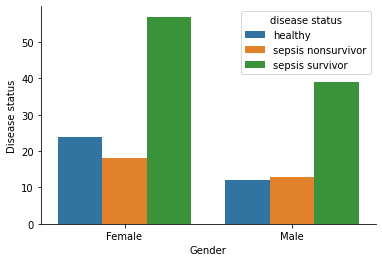

In [ ]:
axes1=sns.barplot(data=df2,x='Gender',y='disease status Count', hue='disease status')
axes1.set(xlabel='Gender', ylabel='Disease status')
sns.despine()

In [ ]:
df3 = df1.groupby(['disease status', 'Gender']).size().reset_index()
df3= df3.rename(columns={0:'Gender Count'})
df3

,disease status,Gender,Gender Count
0,healthy,Female,24
1,healthy,Male,12
2,sepsis nonsurvivor,Female,18
3,sepsis nonsurvivor,Male,13
4,sepsis survivor,Female,57
5,sepsis survivor,Male,39


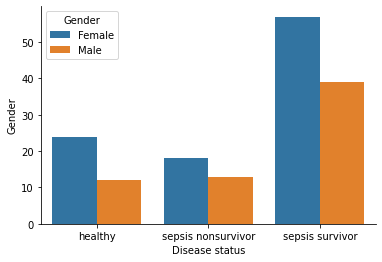

In [ ]:
axes2=sns.barplot(data=df3,x='disease status',y='Gender Count', hue='Gender')
axes2.set(xlabel='Disease status', ylabel='Gender')
sns.despine()

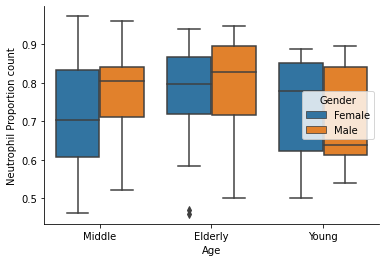

In [ ]:
axes3=sns.boxplot(data=df1,x='Age',y='neutrophil proportion', hue='Gender')
axes3.set(xlabel='Age', ylabel='Neutrophil Proportion count')
sns.despine()

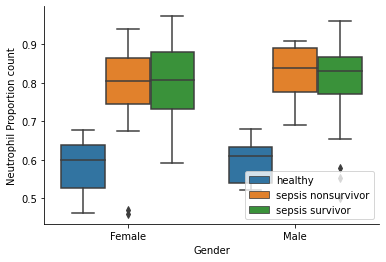

In [ ]:
axes3=sns.boxplot(data=df1,x='Gender',y='neutrophil proportion', hue='disease status')
axes3.set(xlabel='Gender', ylabel='Neutrophil Proportion count')
plt.legend(loc='lower right')
sns.despine()

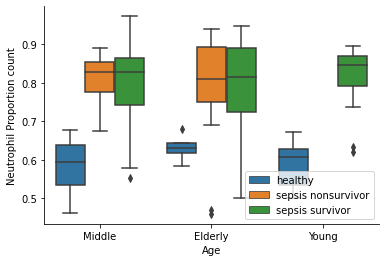

In [ ]:
axes3=sns.boxplot(data=df1,x='Age',y='neutrophil proportion', hue='disease status')
axes3.set(xlabel='Age', ylabel='Neutrophil Proportion count')
plt.legend(loc='lower right')
sns.despine()

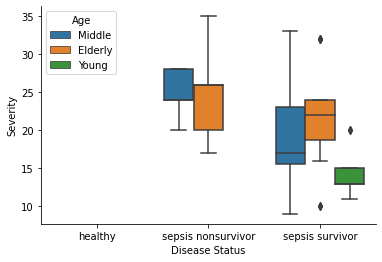

In [ ]:
axes4=sns.boxplot(data=df1,x='disease status',y='severity (apacheii)', hue='Age')
axes4.set(xlabel='Disease Status', ylabel='Severity')
sns.despine()

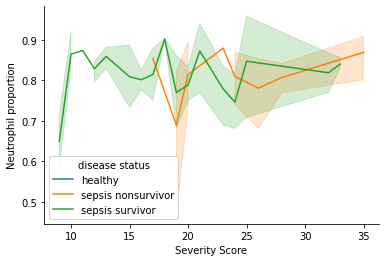

In [ ]:
axes5=sns.lineplot(data=df1,x='severity (apacheii)',y='neutrophil proportion', hue='disease status')
axes5.set(xlabel='Severity Score', ylabel='Neutrophil proportion')

sns.despine()

MSC
Bronchial_Epithelial_cells
Fibroblasts
Endothelial_cells
Adipocytes
Keratinocytes
Schwann_cells
Smooth_muscle_cells
CD34+
Platelets
Monocytes_CD14+CD16-
Monocytes_CD16+CD14-
Macrophage
M1(IFNg)
M2(IL-4)
M(IFNa)
Dendritic_cells_(BDCA1+)
Dendritic_cells_(BDCA3+)
Dendritic_cells_(plasmacytoid+)
T_cells_(CD4+)
T_cells_(CD8+)
T_cells_(gamma-delta)
NK_cells
Neutrophils
Neutrophils_LPS
B_cellspca